# Real Estate - Price Predictor

## Models Used : 
__1) Random Forest Regressor__


__2) KNN Regressor__


__3) SVM Regressor__


__4) Multiple Regression__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/ML End to End Projects/Real Estate Price Prediction/data.csv',na_values=[' '])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()  # so we have 5 missing values in 'RM' variable 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

__Correlation of the Data Variables__

In [7]:
correlation=df.corr()

<AxesSubplot:>

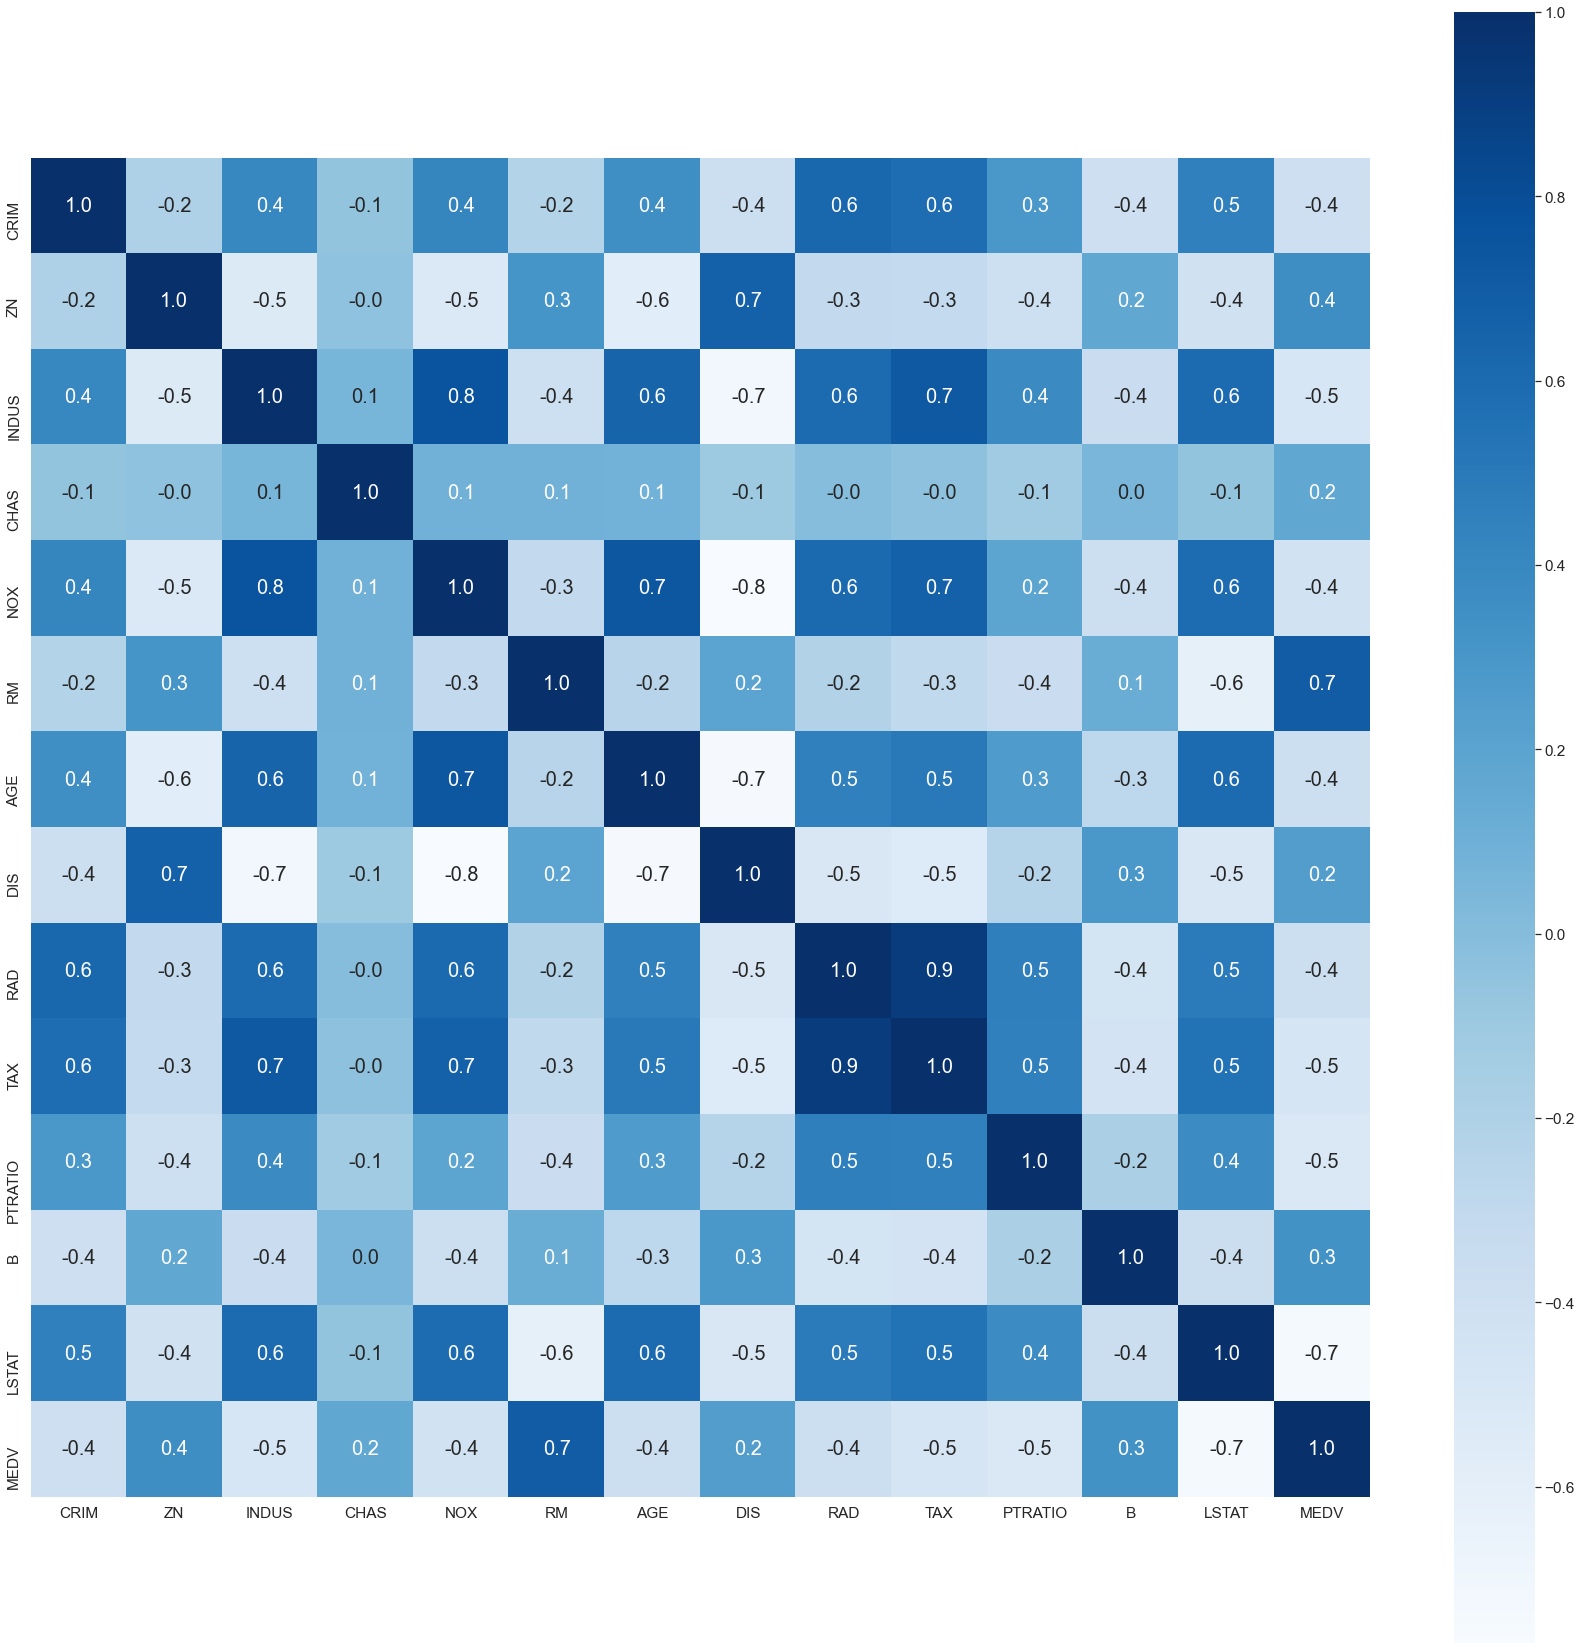

In [8]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.4)  
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={"size":20},cmap='Blues')

In [9]:
correlation['MEDV'].sort_values()  # so there are both the -ve and +ve correlation in the data 

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.696169
MEDV       1.000000
Name: MEDV, dtype: float64

__Data Distribution__

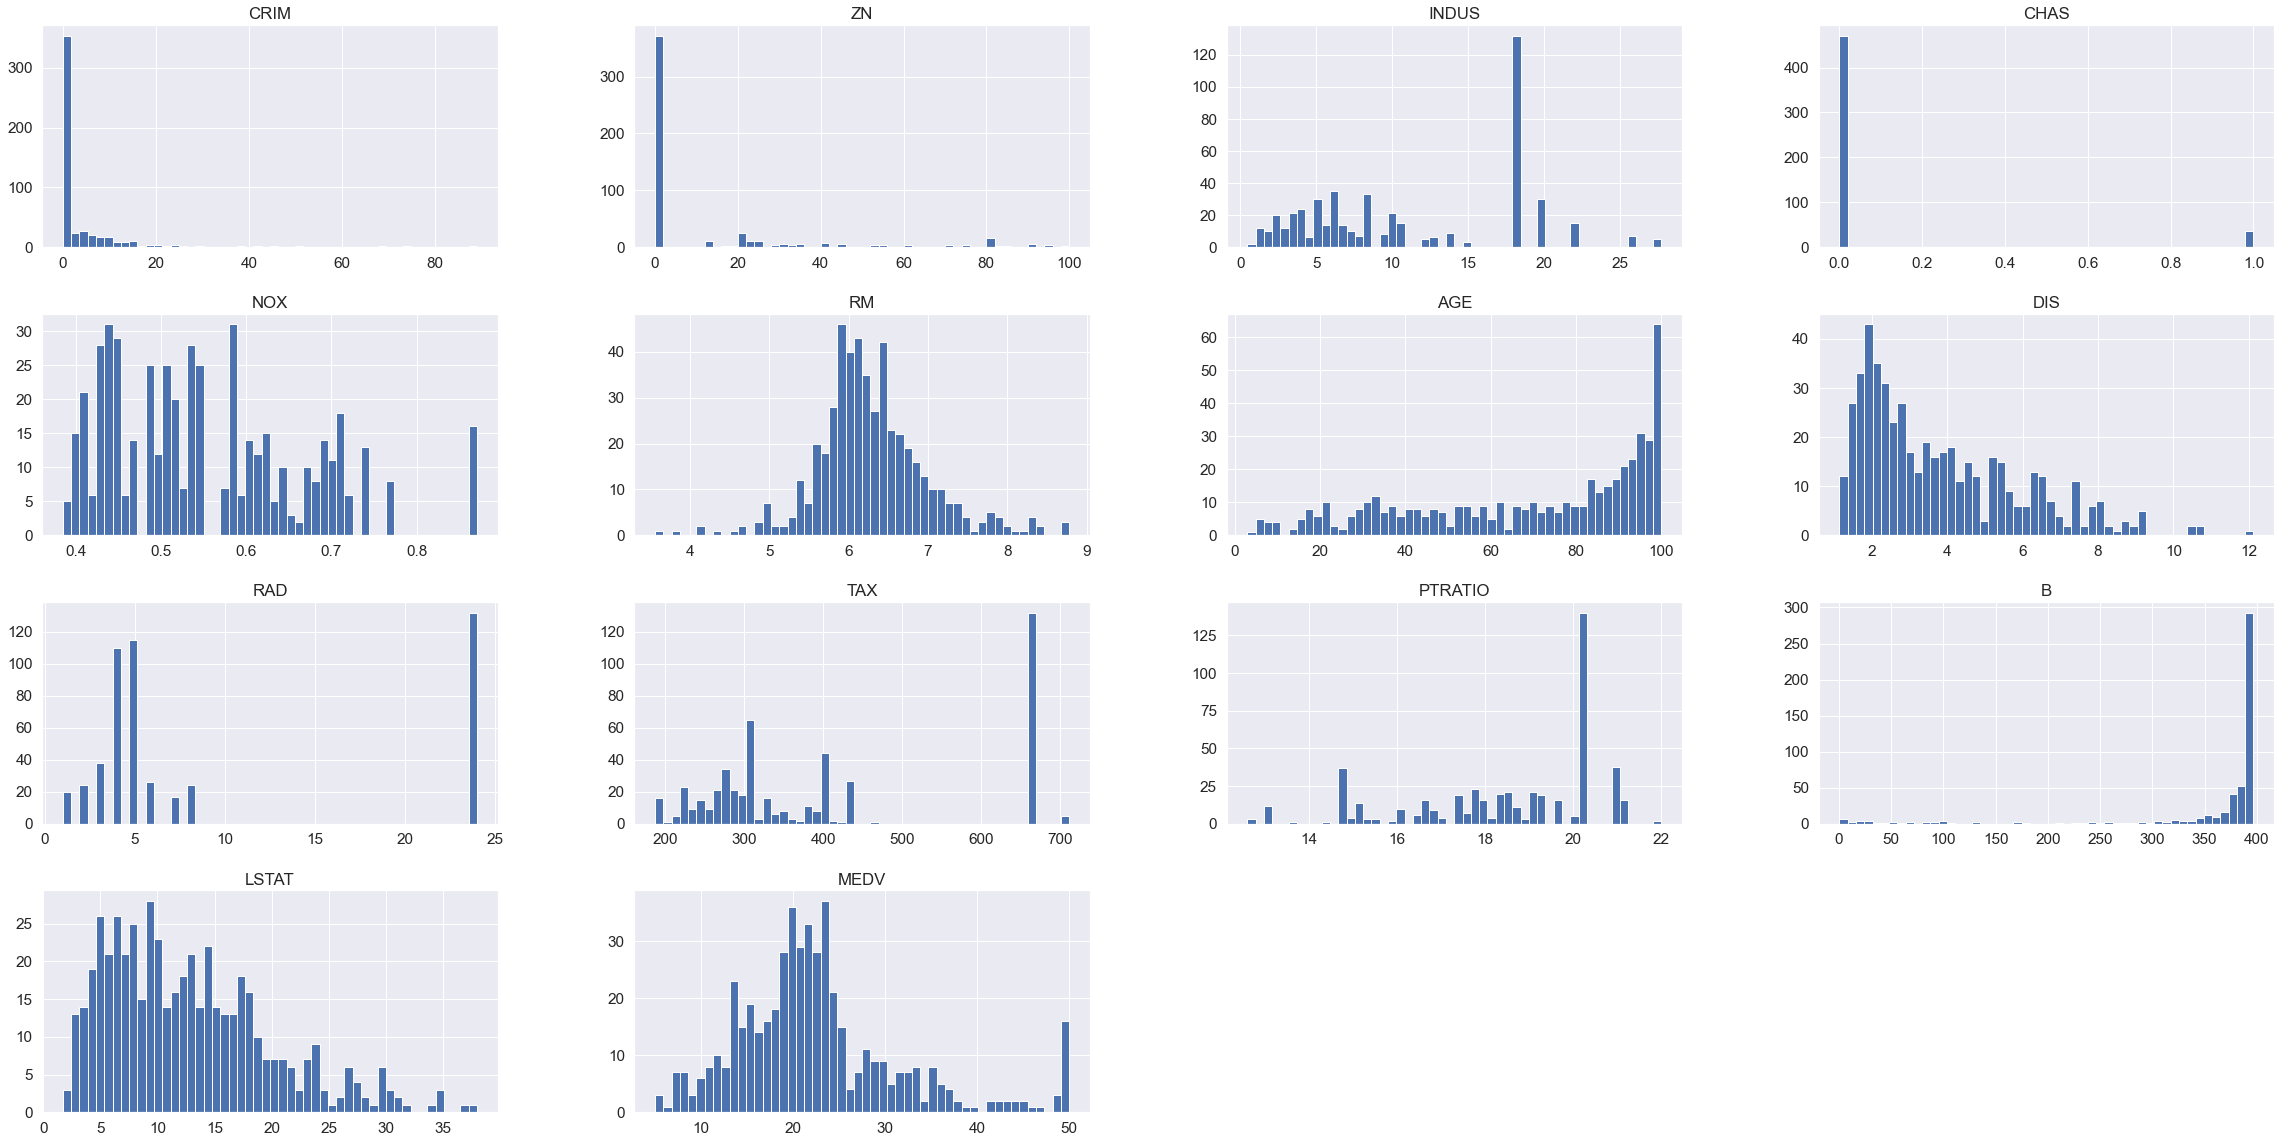

In [10]:
df.hist(bins=50,figsize=(40,20))
plt.show()

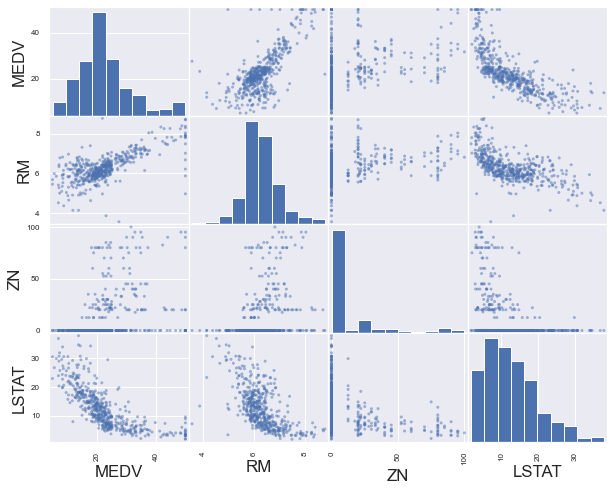

In [11]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']  # selected attributes to find the scatterplot of 
scatter_matrix(df[attributes],figsize=(10,8))
plt.show()

__House Price Distribution__

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

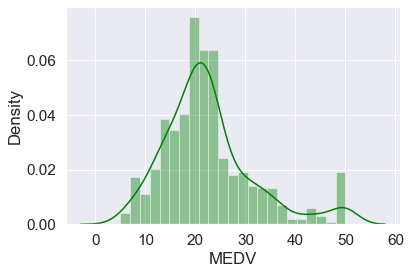

In [12]:
sns.distplot(df['MEDV'],color='green')

__Feature Engineering__

In [13]:
df['TAXRM']=df['TAX']/df['RM']  # created the differnt attribute no of tax per room 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [14]:
correlation=df.corr()
correlation['MEDV'].sort_values()  # new created variable has the -ve strong correlation 

LSTAT     -0.737663
TAXRM     -0.540380
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.696169
MEDV       1.000000
Name: MEDV, dtype: float64

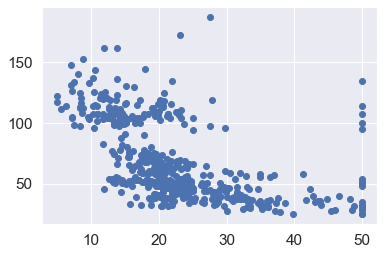

In [15]:
plt.scatter(x='MEDV',y='TAXRM',data=df)   # strong -ve correlation
plt.show()

In [16]:
df=df.sample(frac=1,random_state=2).reset_index(drop=True)  # for shuffling of the data 

__Train/Test Split__
__[Test will be used at the end]__

In [17]:
model_train,model_test=train_test_split(df,test_size=0.1,random_state=2)
model_test.to_csv('Model_FinalTesting_data.csv',index=False)

In [18]:
print(model_train.shape)
print()
print(model_test.shape)

(455, 15)

(51, 15)


## Creating the Pipeline

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])

In [21]:
model_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
266,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8,38.210766
398,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3,32.103825
281,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8,31.436056
407,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1,103.997502
28,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4,31.176714


In [22]:
X=model_train.drop('MEDV',axis=1)
y=model_train['MEDV']

In [23]:
X=my_pipeline.fit_transform(X)

In [24]:
X

array([[-0.41742199,  2.75839558, -1.19876479, ...,  0.4199058 ,
        -1.18590514, -0.92089655],
       [-0.40367166, -0.49078028,  2.12378327, ...,  0.14537739,
         1.7935205 , -1.11681493],
       [-0.36225153,  0.37566662, -1.04946968, ...,  0.32481835,
        -0.96128273, -1.1382378 ],
       ...,
       [-0.40684628, -0.49078028, -1.20754685, ...,  0.01169116,
        -0.85674148, -0.81022864],
       [-0.41745784, -0.49078028, -0.59572963, ...,  0.43367559,
        -0.50497429, -0.93764079],
       [-0.41266119, -0.49078028,  0.40249846, ...,  0.38900509,
        -0.42727472, -0.81364942]])

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

__Importing the models__

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm

## 1) RandomForestRegressor

In [27]:
model_RanForest=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
predict_RanForest=model_RanForest.predict(X_test)

In [28]:
def model_prediciton(val1,val2):
    print(f'Mean actual value : {val1.mean()} predicted values : {val2.mean()}')
    print(f'StdDeviation actual value : {val1.std()} and the predicted values : {val2.std()}')
    print(f'RMSE : {metrics.mean_squared_error(val1,val2,squared=False)}')
model_prediciton(y_test,predict_RanForest)

Mean actual value : 23.380434782608692 predicted values : 23.27721739130435
StdDeviation actual value : 9.602328874120241 and the predicted values : 7.826408851954922
RMSE : 2.9752119033045745


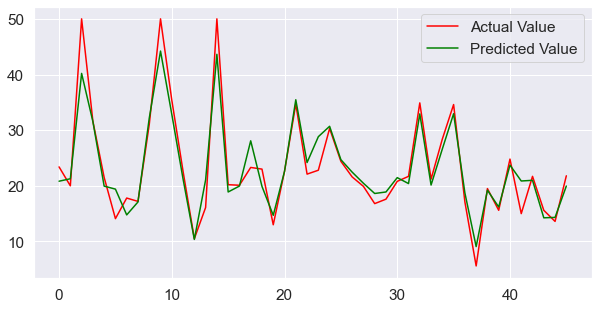

In [29]:
plt.figure(figsize=(10,5))
plt.plot(list(y_test),color='red',label='Actual Value')
plt.plot(predict_RanForest,color='green',label='Predicted Value')
plt.legend()
plt.show()

## 2) KNeighborsRegressor

In [30]:
model_KNeigh=KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
predict=model_KNeigh.predict(X_test)

Now picking the best value of k based on the Mean Squared Error(MSE)

In [31]:
error_mse=[]
for i in range(1,50):
    model_KNeigh=KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
    predict=model_KNeigh.predict(X_test)
    err_values=metrics.mean_squared_error(y_test,predict)
    error_mse.append(err_values)

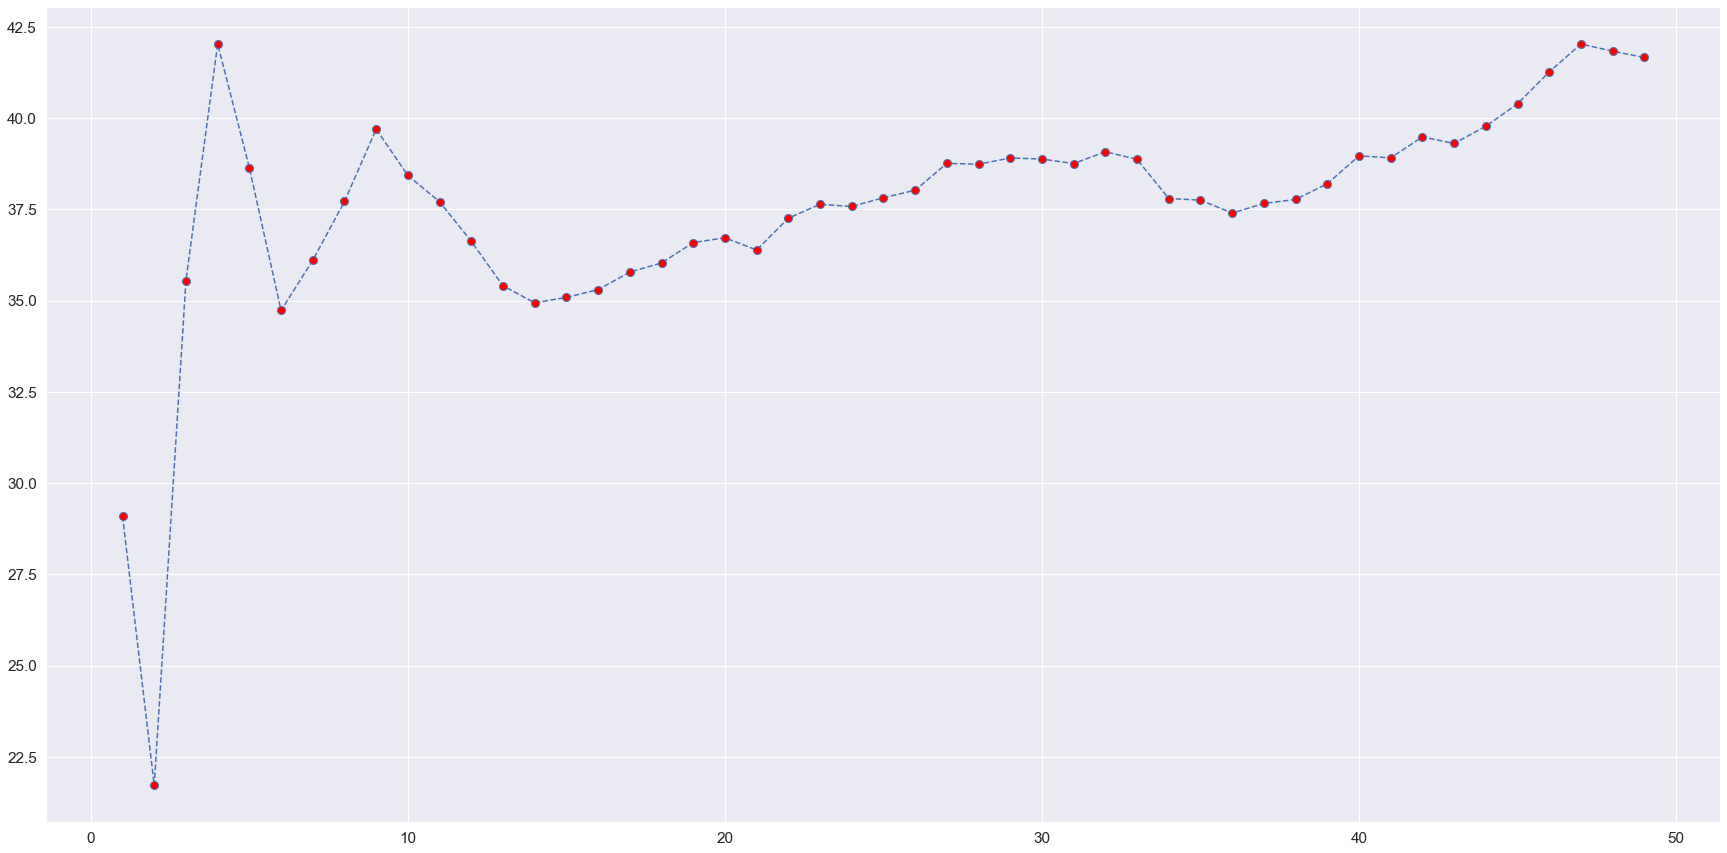

In [32]:
plt.figure(figsize=(30,15))
plt.plot(range(1,50),error_mse,linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=8)
plt.show()

So the best k value should be between 2-5

In [33]:
model_KNeigh=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
predict_KNeigh=model_KNeigh.predict(X_test)

In [34]:
def model_prediciton(val1,val2):
    print(f'Mean actual value : {val1.mean()} predicted values : {val2.mean()}')
    print(f'StdDeviation actual value : {val1.std()} and the predicted values : {val2.std()}')
    print(f'RMSE : {metrics.mean_squared_error(val1,val2,squared=False)}')
model_prediciton(y_test,predict_KNeigh)

Mean actual value : 23.380434782608692 predicted values : 22.757608695652173
StdDeviation actual value : 9.602328874120241 and the predicted values : 7.043984231021596
RMSE : 4.6603729557790246


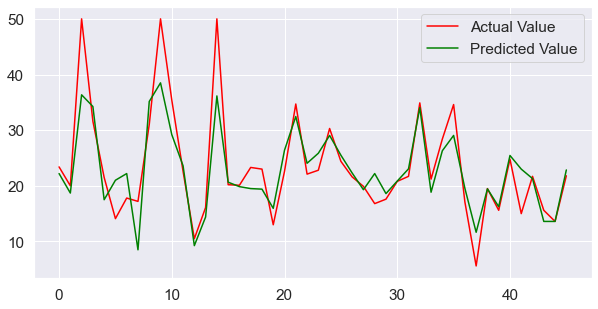

In [35]:
plt.figure(figsize=(10,5))
plt.plot(list(y_test),color='red',label='Actual Value')
plt.plot(predict_KNeigh,color='green',label='Predicted Value')
plt.legend()
plt.show()

## 3) SVM (Regressor)

In [36]:
model_svm=SVR(kernel='linear').fit(X_train,y_train)
predict_svm=model_svm.predict(X_test)

In [37]:
def model_prediciton(val1,val2):
    print(f'Mean actual value : {val1.mean()} predicted values : {val2.mean()}')
    print(f'StdDeviation actual value : {val1.std()} and the predicted values : {val2.std()}')
    print(f'RMSE : {metrics.mean_squared_error(val1,val2,squared=False)}')
model_prediciton(y_test,predict_svm)

Mean actual value : 23.380434782608692 predicted values : 22.30048071949056
StdDeviation actual value : 9.602328874120241 and the predicted values : 6.625490713127212
RMSE : 5.715376591901727


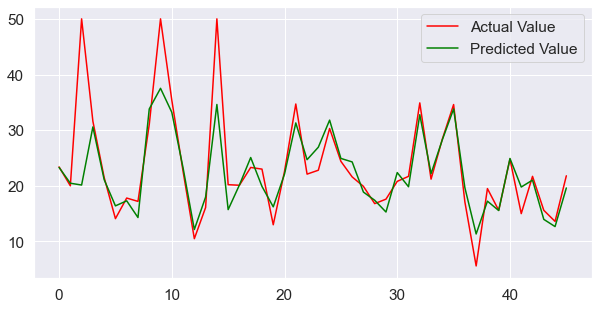

In [38]:
plt.figure(figsize=(10,5))
plt.plot(list(y_test),color='red',label='Actual Value')
plt.plot(predict_svm,color='green',label='Predicted Value')
plt.legend()
plt.show()

## 4) Multiple Regression 

In [39]:
X_train=sm.add_constant(X_train)
model_multiple=sm.OLS(y_train,X_train).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          6.09e-131
Time:                        22:12:15   Log-Likelihood:                -1155.2
No. Observations:                 409   AIC:                             2340.
Df Residuals:                     394   BIC:                             2401.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4852      0.206    109.281      0.0

In [40]:
X_test=sm.add_constant(X_test)
predict_multiple=model_multiple.predict(X_test)

In [41]:
def model_prediciton(val1,val2):
    print(f'Mean actual value : {val1.mean()} predicted values : {val2.mean()}')
    print(f'StdDeviation actual value : {val1.std()} and the predicted values : {val2.std()}')
    print(f'RMSE : {metrics.mean_squared_error(val1,val2,squared=False)}')
model_prediciton(y_test,predict_multiple)

Mean actual value : 23.380434782608692 predicted values : 22.910536310936006
StdDeviation actual value : 9.602328874120241 and the predicted values : 7.337490147764441
RMSE : 5.001834639636283


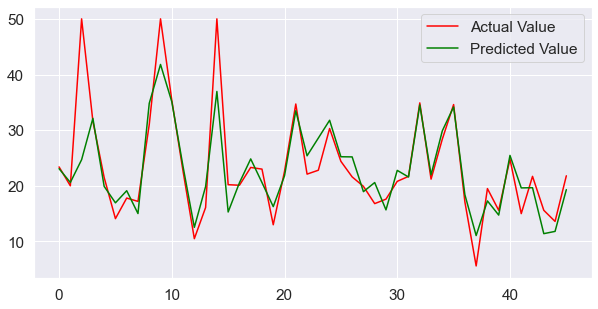

In [42]:
plt.figure(figsize=(10,5))
plt.plot(list(y_test),color='red',label='Actual Value')
plt.plot(predict_multiple,color='green',label='Predicted Value')
plt.legend()
plt.show()

## Saving the model 

In [43]:
from joblib import dump,load
dump(model_RanForest,'Final_Model.joblib')

['Final_Model.joblib']

# Model Testing Final

In [45]:
data=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/ML End to End Projects/Real Estate Price Prediction/Model_FinalTesting_data.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1,62.471500
1,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2,105.513308
2,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1,108.930324
3,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,23.8,46.292066
4,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8,77.709217


In [46]:
X_model_test=data.drop('MEDV',axis=1)
X_model_test=my_pipeline.transform(X_model_test)
y_model_test=data['MEDV']

In [48]:
model=load('/Users/amit/Documents/Data Science/Machine Lerning and Data science/ML End to End Projects/Real Estate Price Prediction/Final_Model.joblib')

In [49]:
predict=model.predict(X_model_test)

In [51]:
def model_prediciton(val1,val2):
    print(f'Mean actual value : {val1.mean()} predicted values : {val2.mean()}')
    print(f'StdDeviation actual value : {val1.std()} and the predicted values : {val2.std()}')
    print(f'RMSE : {metrics.mean_squared_error(val1,val2,squared=False)}')
model_prediciton(y_model_test,predict)

Mean actual value : 22.533333333333335 predicted values : 23.251333333333328
StdDeviation actual value : 8.177057335415148 and the predicted values : 7.843237830972781
RMSE : 4.313855820401941


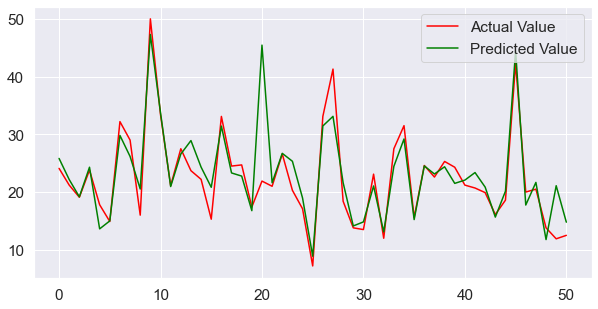

In [52]:
plt.figure(figsize=(10,5))
plt.plot(list(y_model_test),color='red',label='Actual Value')
plt.plot(predict,color='green',label='Predicted Value')
plt.legend()
plt.show()